In [5]:
import tensorflow as tf
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import csv
from PIL import Image
from tensorflow.keras.applications import ResNet50
TRAIN_EVALUATE_IMG = True

EXTERNAL = False

if EXTERNAL:
  %store -r TEXT
  %store -r VISUALIZE
  %store -r SAVE_FOLDER
  %store -r PROJECT_NAME
  %store -r SHOW_OUTPUT
  %store -r IMG_NUMBER
  %store -r THUMBNAIL
else:  
  VISUALIZE = True  
  SAVE_FOLDER = "D:\\Deletar\\p_gen"
  PROJECT_NAME = "THE FELLOWSHIP OF THE RING"
  STYLES_FOLDER = ".\\styles"
  SHOW_OUTPUT = True
  IMG_NUMBER = 2

WIDTH = 128
HEIGHT = 128



In [6]:
def decode_image(image_name):
    image = tf.io.read_file("D:\\OneDrive\\Desktop\\machine-2\\images\\" + image_name)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (WIDTH,HEIGHT), antialias=True)    
    return image

if TRAIN_EVALUATE_IMG:    
    dtrain = pd.read_csv('D:\\OneDrive\\Desktop\\machine-2\\data\\train.csv', encoding='latin-1')
    image_names = dtrain['ImageFile'].to_list()
    image_names = tf.convert_to_tensor(image_names, dtype=tf.string)

    dtrain['score'] = tf.cast(dtrain['score'],dtype=tf.float32)  
    
    sco_arr = []
    for i in dtrain['score']:        
            temp_str = tf.cast(i,dtype=tf.float32)
            sco_arr.append(temp_str)

    dataset = tf.data.Dataset.from_tensor_slices((image_names, sco_arr))
    dataset = dataset.map(lambda x, y: (decode_image(x), y))

      # Normalize images
    dataset = dataset.map(lambda x, y: (x / 255.0, y))

    dtest = pd.read_csv('D:\\OneDrive\\Desktop\\machine-2\\data\\test.csv', encoding='latin-1')
    image_names = dtest['ImageFile'].to_list()
    image_names = tf.convert_to_tensor(image_names, dtype=tf.string)

    dtest['score'] = tf.cast(dtest['score'],dtype=tf.float32)  
    
    sco_arr = []
    for i in dtest['score']:        
            temp_str = tf.cast(i,dtype=tf.float32)
            sco_arr.append(temp_str)

    dataset2 = tf.data.Dataset.from_tensor_slices((image_names, sco_arr))
    dataset2 = dataset2.map(lambda x, y: (decode_image(x), y))

      # Normalize images
    dataset2 = dataset2.map(lambda x, y: (x / 255.0, y))
         

    # Create a simple model 
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(WIDTH,HEIGHT,3))
    base_model.trainable = False

    model = tf.keras.Sequential([
    base_model,
        tf.keras.layers.Flatten(),
        
        tf.keras.layers.Dense(1, )
    ])
    """ model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(WIDTH, HEIGHT, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ]) """
    """ initializer = tf.random_normal_initializer(0., 0.02)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(64, 4, padding='same', strides=2, kernel_initializer=initializer, use_bias=False,),)
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.LeakyReLU())
    initializer = tf.random_normal_initializer(0., 0.02)
    model.add(tf.keras.layers.Conv2D(64, 4, padding='same', strides=2, kernel_initializer=initializer, use_bias=False,),)    
    model.add(tf.keras.layers.LeakyReLU())
    initializer = tf.random_normal_initializer(0., 0.02)
    model.add(tf.keras.layers.Conv2D(64, 4, padding='same', strides=2, kernel_initializer=initializer, use_bias=False,),)    
    model.add(tf.keras.layers.LeakyReLU())
    initializer = tf.random_normal_initializer(0., 0.02)
    model.add(tf.keras.layers.Conv2D(64, 4, padding='same', strides=2, kernel_initializer=initializer, use_bias=False,),)    
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Flatten()) """
    """ model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5)) """
    
    
    

    model.compile(optimizer='Adam', loss='MAE', metrics=['accuracy'])
    model.fit(dataset.batch(32).shuffle(100), epochs=100, validation_data=dataset2.batch(32))
     
    

Epoch 1/100
265/265 [==============================] - 12s 37ms/step - loss: 0.1835 - accuracy: 0.0058 - val_loss: 0.2100 - val_accuracy: 0.0040
Epoch 2/100
265/265 [==============================] - 10s 35ms/step - loss: 0.1639 - accuracy: 0.0061 - val_loss: 0.1717 - val_accuracy: 0.0000e+00
Epoch 3/100
265/265 [==============================] - 10s 36ms/step - loss: 0.1702 - accuracy: 0.0067 - val_loss: 0.2566 - val_accuracy: 0.0040
Epoch 4/100
265/265 [==============================] - 10s 35ms/step - loss: 0.1616 - accuracy: 0.0061 - val_loss: 0.1774 - val_accuracy: 0.0010
Epoch 5/100
265/265 [==============================] - 10s 37ms/step - loss: 0.1567 - accuracy: 0.0058 - val_loss: 0.2393 - val_accuracy: 0.0000e+00
Epoch 6/100
265/265 [==============================] - 10s 35ms/step - loss: 0.1620 - accuracy: 0.0065 - val_loss: 0.1718 - val_accuracy: 0.0000e+00
Epoch 7/100
265/265 [==============================] - 10s 35ms/step - loss: 0.1619 - accuracy: 0.0053 - val_loss: 0.1

KeyboardInterrupt: 

[[0.50036323]]


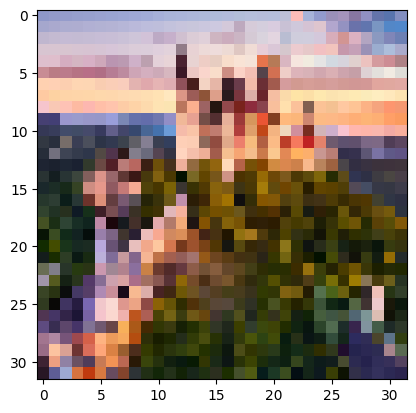

In [ ]:
def process_img2(file_path):
    """ img = tf.io.read_file(f"D:\\OneDrive\\Desktop\\machine-2\\data\\images\\{file_path}") """
    image_string = tf.compat.as_str_any(file_path)
    img = tf.io.read_file(file_path)    
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, [WIDTH,HEIGHT])      
    return img

img2 = process_img2("D:\\OneDrive\\Desktop\\machine-2\\result.jpg")

""" # Load the image
img = tf.io.read_file("D:\\OneDrive\\Desktop\\machine-2\\template.jpg")
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize(img, (256, 256))
img = tf.keras.applications.resnet50.preprocess_input(img) """

# Get the prediction
prediction = model.predict(img2[tf.newaxis, ...])

# Print the prediction
print(prediction)
plt.imshow(img2)


In [ ]:
""" files_ds = tf.data.Dataset.from_tensor_slices((dtrain['ImageFile'], sco_arr))
files_ds = files_ds.map(lambda x, y: (process_img(x), y)).batch(1)
print(files_ds) 
model = tf.keras.Sequential()

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])
model.fit(files_ds,epochs=2, verbose=1)  """


""" files_ds = tf.data.Dataset.from_tensor_slices((aaa, sco_arr))
files_ds = files_ds.map(lambda x, y: (x, y)).batch(1) 
model = tf.keras.Sequential()

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])
model.fit(files_ds,epochs=2, verbose=1) """
""" dtrain = pd.read_csv('D:\\OneDrive\\Desktop\\machine-2\\data\\train.csv', encoding='latin-1') """
""" model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=(256,256,3)))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='softmax')) """

    # Compile and train the model
""" model.compile(optimizer='adam', loss='MSE', metrics=['accuracy'])
    model.fit(dataset.batch(32), epochs=10) """
""" aaa = []
    for number, i in enumerate(str_arr):
        if number < 100:
            aaa.append(process_img(i)) """
""" dtest = pd.read_csv('./data/test.csv', encoding='latin-1')  """   
""" files_ds = tf.data.Dataset((process_img(dtrain['ImageFile']), dtrain['score']))
    files_ds = files_ds.map(lambda x, y: (x, y)).batch(1) """
""" files_ds = tf.data.Dataset.from_tensor_slices(dtrain['score'])
    files_ds = files_ds.map(lambda x, y: (x, y)).batch(1)  """
""" val_files = tf.data.Dataset.from_tensor_slices((dtest['ImageFile'], dtest['score']))
    val_files = val_files.map(lambda x, y: (process_img(x), tf.constant(y,dtype=tf.float32))).batch(2) """
""" model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(256,256,3)),
    tf.keras.layers.Dense(784/2, activation='relu'),
    tf.keras.layers.Dense(784/2, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
]) 
"""
""" model = tf.keras.Sequential() """
""" model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(WIDTH, HEIGHT,3)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(2, activation='softmax')
        ]) """

""" model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])
    model.fit(files_ds,epochs=2, verbose=1) """
""" files_ds = tf.data.Dataset.from_tensor_slices((train_bw[i], train_color[i])) """


' files_ds = tf.data.Dataset.from_tensor_slices((train_bw[i], train_color[i])) '